In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import os 
import tarfile
from six.moves import urllib

In [2]:
def load_csv(path):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)

In [3]:
wine_data = load_csv("E:\Labs\AI\Datasets\winequality-red.csv")

In [4]:
wine_data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


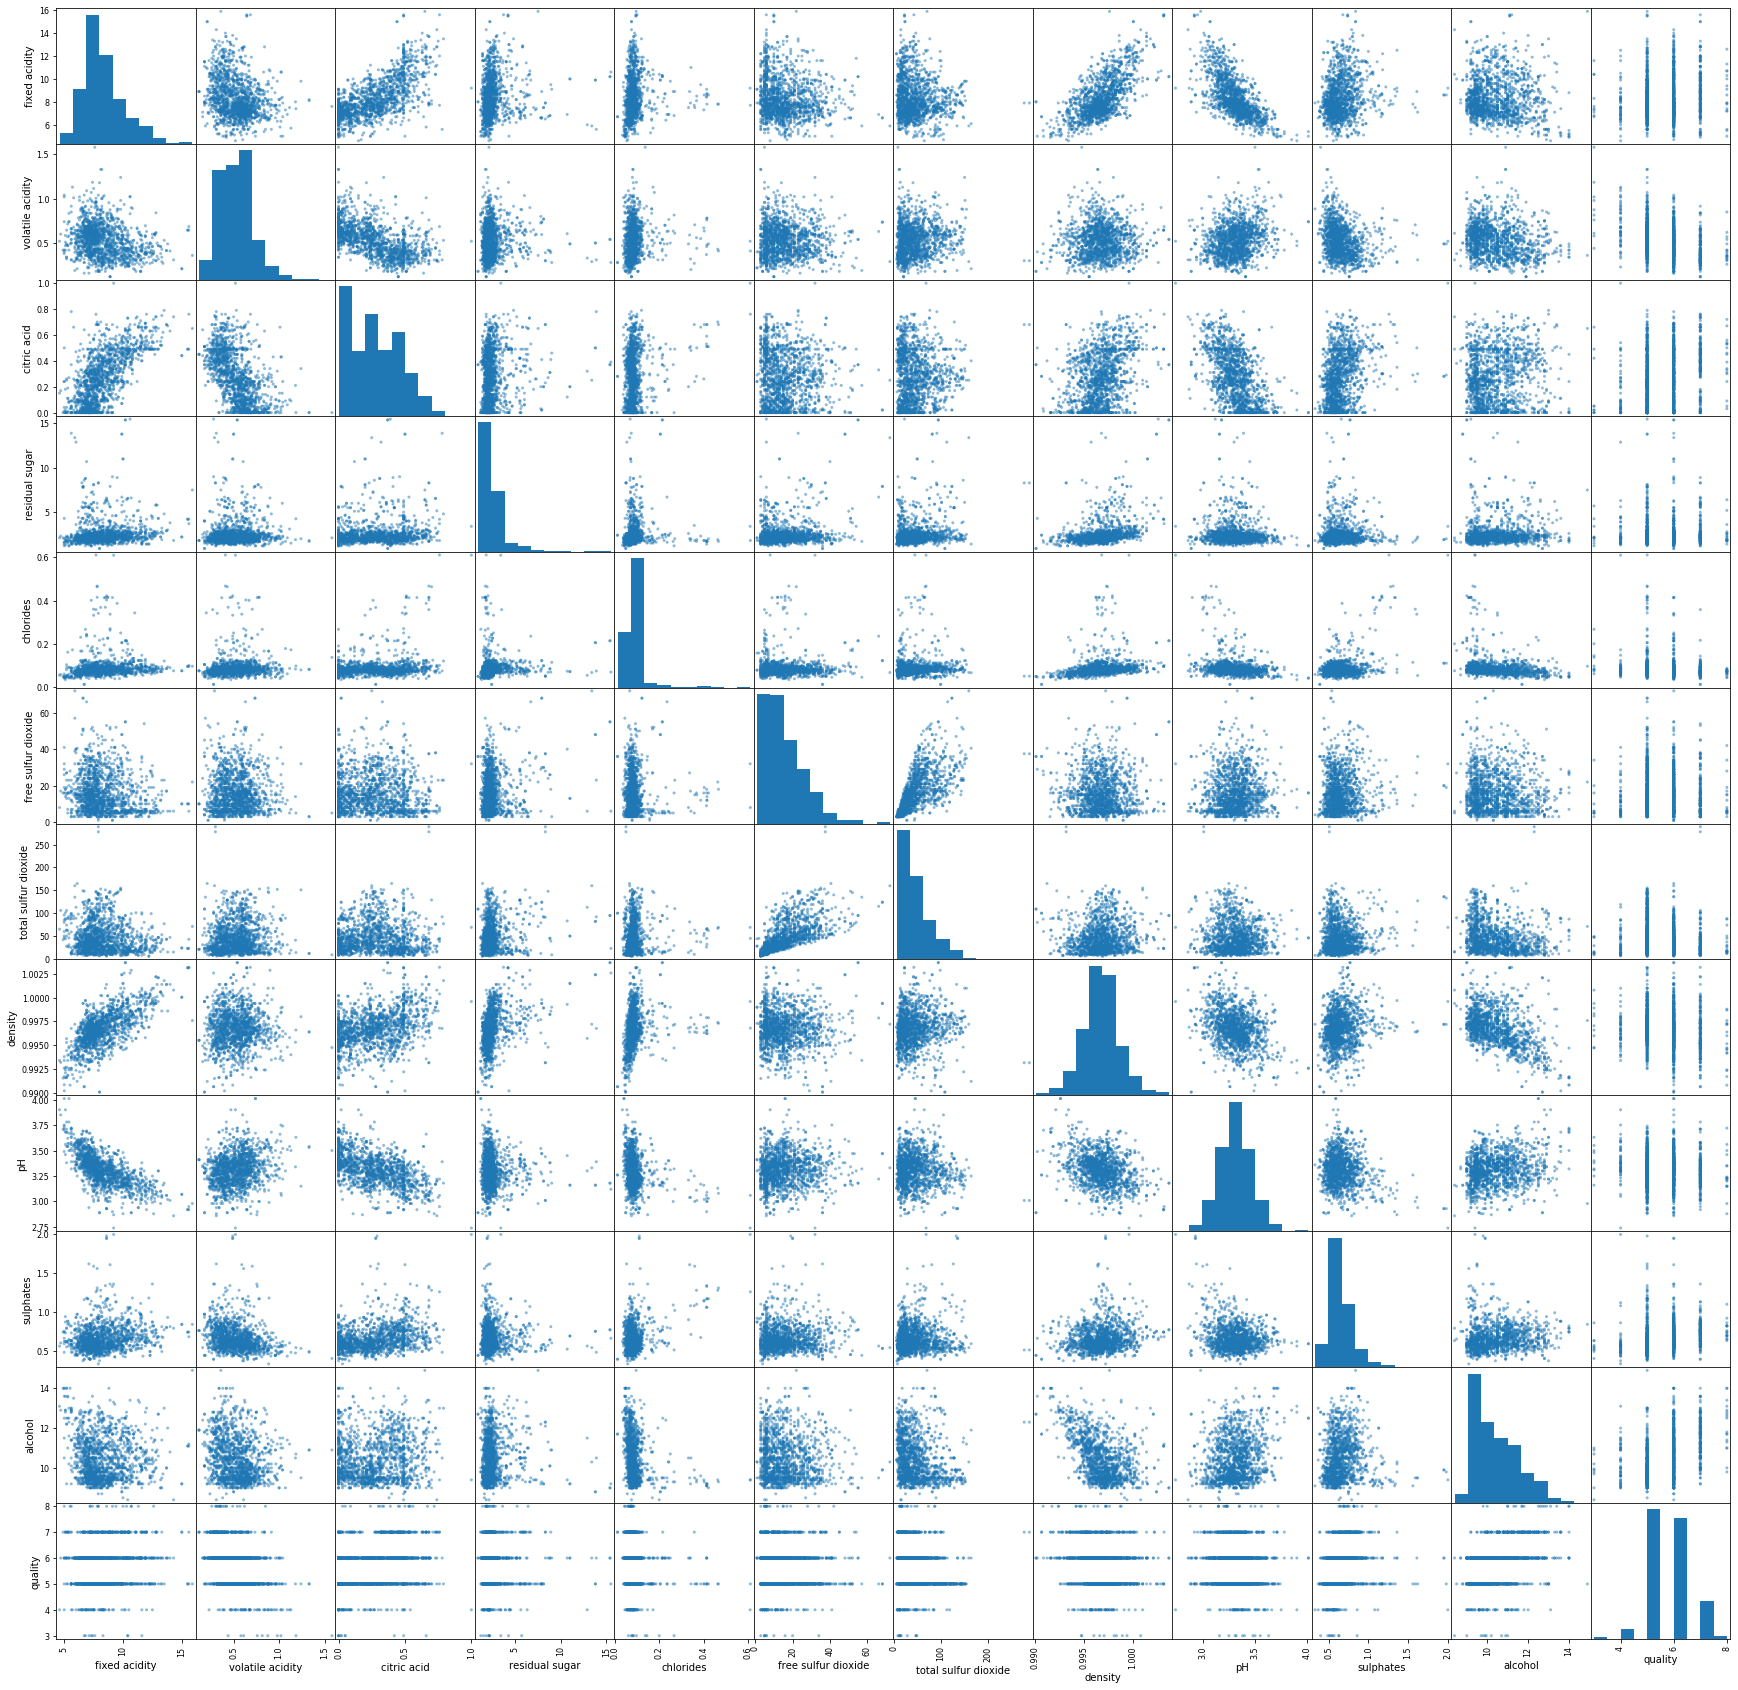

In [5]:
from pandas.plotting import scatter_matrix
attributes = wine_data.columns
scatter_matrix(wine_data, figsize=(30, 30));

In [6]:
min_corr = 0.1
wine_data.corrwith(wine_data["quality"]).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()

quality                 1.000000
alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
dtype: float64

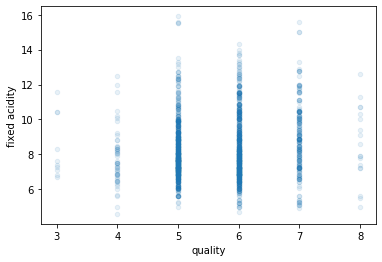

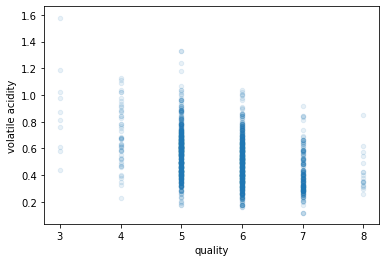

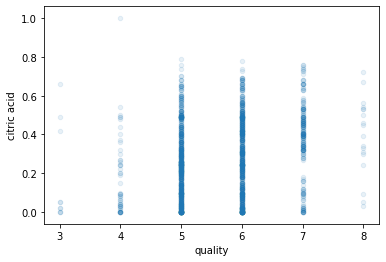

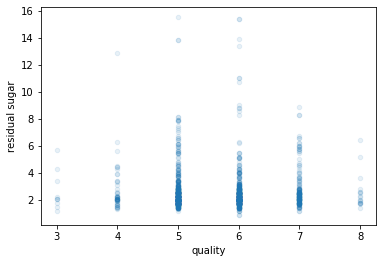

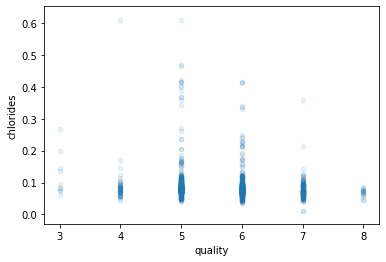

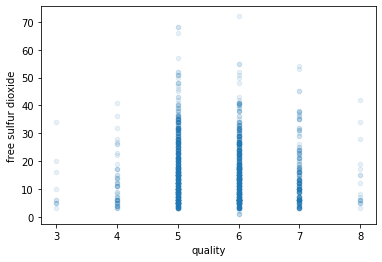

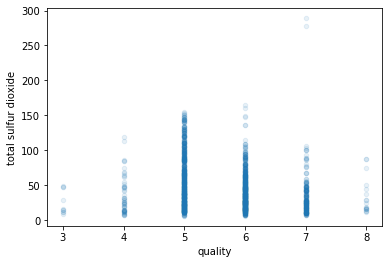

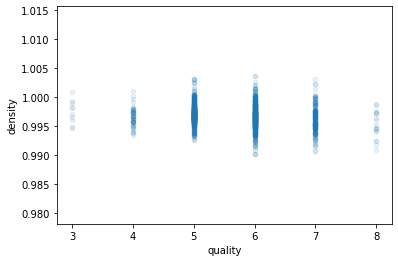

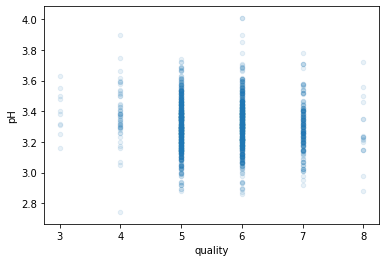

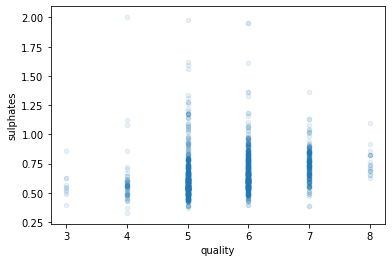

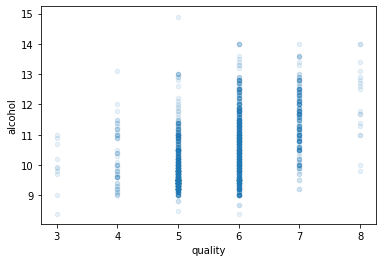

In [7]:
for field in wine_data.columns:
    if field == "quality":
        continue
    wine_data.plot(kind="scatter", x="quality", y=field, alpha=0.1)

In [8]:
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
target = wine_data["quality"].apply(lambda x : float(x > 6.5))
target.value_counts()

0.0    1382
1.0     217
Name: quality, dtype: int64

In [10]:
wine_data = pd.concat([wine_data.drop("quality", axis=1), target], axis=1)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.0


In [11]:
corr_fields = wine_data.corrwith(wine_data["quality"]).apply(lambda x : (abs(x), x)).sort_values(ascending=False).apply(lambda x : x[1]).where(lambda x : abs(x) > min_corr).dropna()
print(corr_fields)

quality                 1.000000
alcohol                 0.407315
volatile acidity       -0.270712
citric acid             0.214716
sulphates               0.199485
density                -0.150460
total sulfur dioxide   -0.139517
fixed acidity           0.120061
dtype: float64


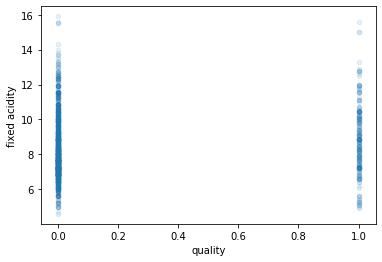

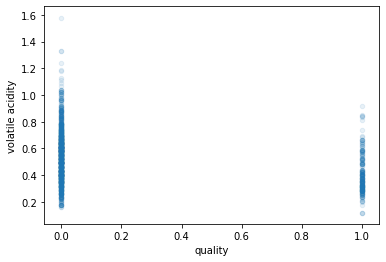

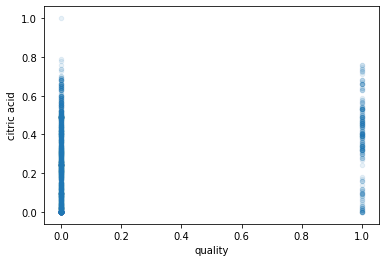

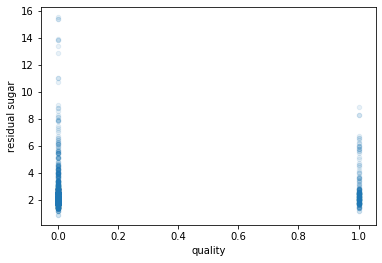

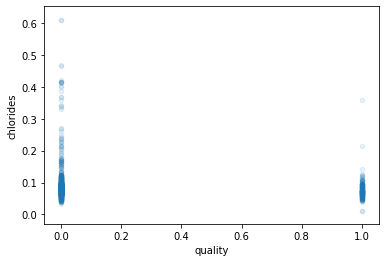

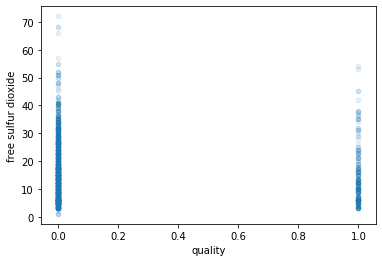

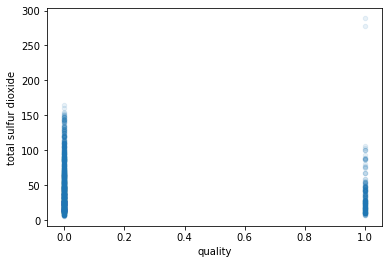

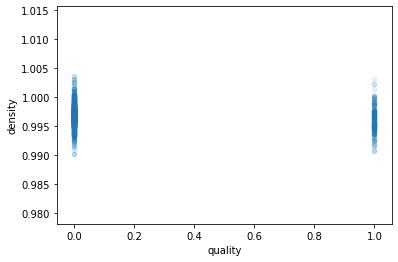

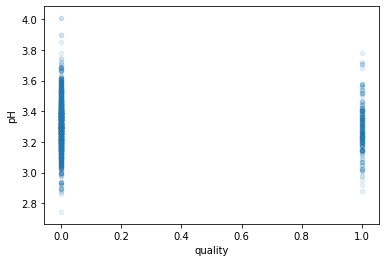

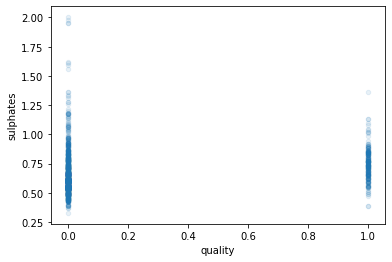

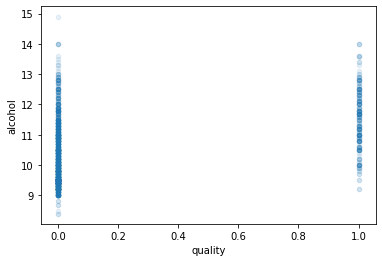

In [12]:
for field in wine_data.columns:
    if field == "quality":
        continue
    wine_data.plot(kind="scatter", x="quality", y=field, alpha=0.1)

In [13]:
trunc_data = wine_data[corr_fields.index]
trunc_data.to_csv('E:\Labs\AI\Datasets\wine_ready_trunc.csv')

full_data = wine_data
full_data.to_csv('E:\Labs\AI\Datasets\wine_ready_full.csv')